In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [21]:
columns =  ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dev_pt_temp", "radiation", "rain", "snow", "functional"]

df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

df

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [22]:
df.columns = columns
df["functional"] = (df["functional"] == "Yes").astype(int)
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dev_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [23]:
df = df[df["hour"] == 12]

df = df.drop(["hour"], axis=1)

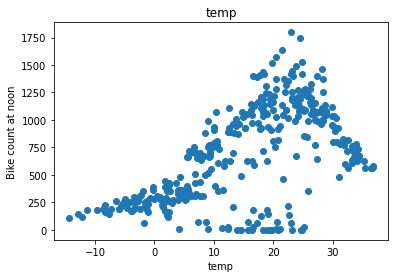

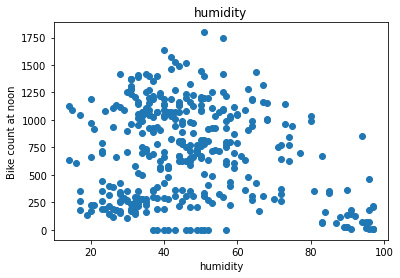

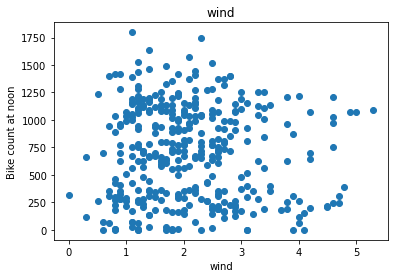

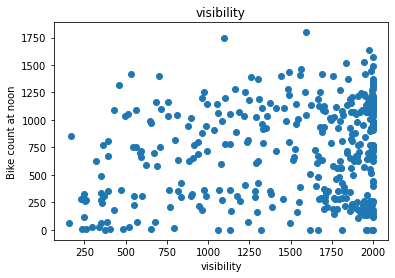

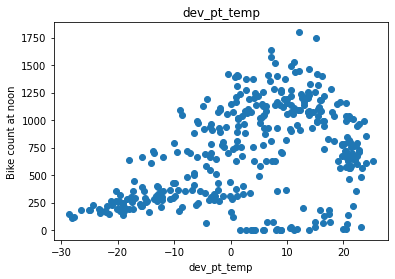

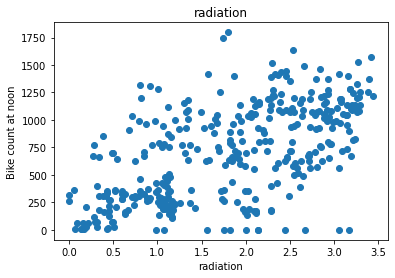

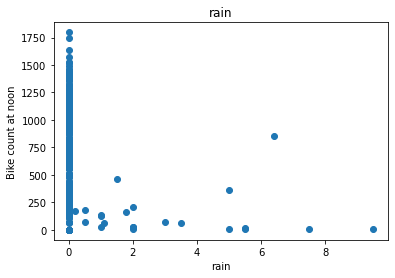

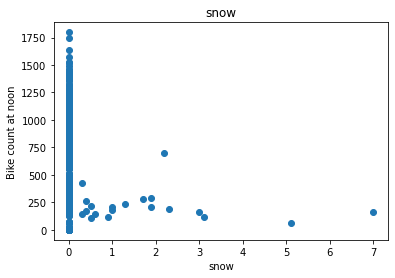

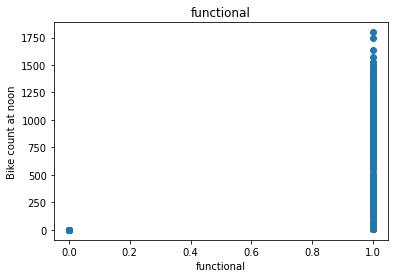

In [24]:
for label in df.columns[1:]:

    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike count at noon")
    plt.xlabel(label)
    plt.show()

In [25]:
df = df.drop(["wind", "visibility", "functional"], axis = 1)

# Separate train, validation and test datasets

In [26]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [27]:
def get_xy(dataframe, y_label, x_label):

    dataframe = copy.deepcopy(dataframe)

    if not x_label:

        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values

    else:

        if len(x_label) == 1:

            X = dataframe[x_label[0]].values.reshape(-1, 1)
        else:

            X = dataframe[x_label].values

    Y = dataframe[y_label].values.reshape(-1, 1)

    data = np.hstack((X,Y))

    return data, X, Y


In [28]:
_, x_ttemp, y_ttemp = get_xy(train, "bike_count", x_label= ["temp"])
_, x_ttemp, y_ttemp = get_xy(val, "bike_count", x_label= ["temp"])
_, x_ttemp, y_ttemp = get_xy(test, "bike_count", x_label= ["temp"])

In [29]:
temp_reg = LinearRegression()

temp_reg.fit(x_ttemp, y_ttemp)

LinearRegression()

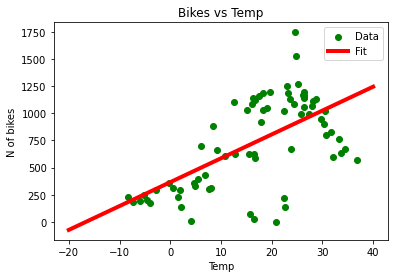

In [33]:
plt.scatter(x_ttemp, y_ttemp, label="Data", color="green")

x = tf.linspace(-20,40,100)

plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=4)

plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("N of bikes")
plt.xlabel("Temp")

plt.show()

# Multiple Linear Regression